In [11]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [12]:

# Load the provided CSV files for Bitcoin and Nasdaq
bitcoin_df = pd.read_csv('../datasets/Bitcoin.csv')
nasdaq_df = pd.read_csv('../datasets/Nasdaq.csv')

# Display the first few rows of each dataframe to understand their structure
bitcoin_df.head(), nasdaq_df.head()

(         Date  Price (USD)
 0  02/13/2024      49406.6
 1  02/12/2024      49924.4
 2  02/11/2024      48122.6
 3  02/10/2024      48364.5
 4  02/09/2024      47290.7,
          Date  Price (USD)
 0  02/13/2024     17600.42
 1  02/12/2024     17882.66
 2  02/09/2024     17962.41
 3  02/08/2024     17783.17
 4  02/07/2024     17755.07)

In [13]:
# Convert the 'Date' column to datetime format for both datasets
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date'])

# Merge the datasets on the 'Date' column to align them
merged_df = bitcoin_df.merge(nasdaq_df, on='Date', suffixes=('_Bitcoin', '_Nasdaq'))

# Sort the data by date to ensure a proper time-series plot
merged_df.sort_values('Date', inplace=True)


merged_df

,Date,Price (USD)_Bitcoin,Price (USD)_Nasdaq
1194,2019-03-08,3865.9,7015.69
1193,2019-03-11,3865.1,7164.02
1192,2019-03-12,3886.0,7201.28
1191,2019-03-13,3864.9,7256.98
1190,2019-03-14,3879.8,7243.01
...,...,...,...
4,2024-02-07,44507.2,17755.07
3,2024-02-08,45930.2,17783.17
2,2024-02-09,47290.7,17962.41
1,2024-02-12,49924.4,17882.66


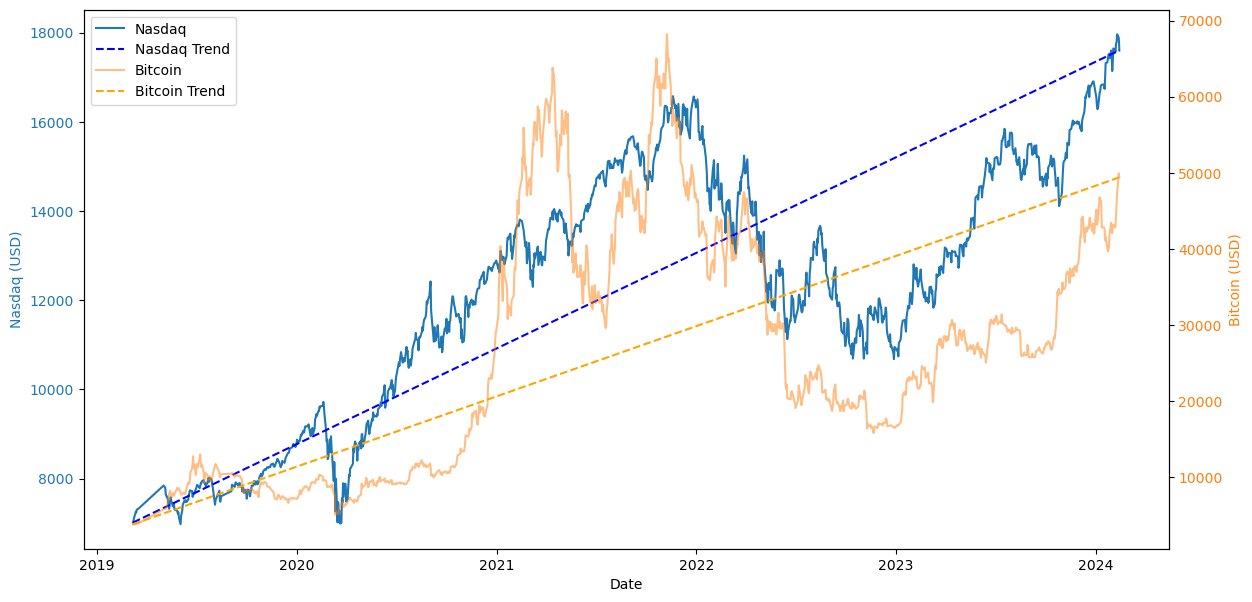

In [14]:
# Creating a plot with dual y-axis to make Nasdaq appear to perform better than Bitcoin
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Nasdaq (USD)', color=color)
ax1.plot(merged_df['Date'], merged_df['Price (USD)_Nasdaq'], label='Nasdaq', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
ax2.set_ylabel('Bitcoin (USD)', color=color)  # we already handled the x-label with ax1
ax2.plot(merged_df['Date'], merged_df['Price (USD)_Bitcoin'], label='Bitcoin', color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

start_nasdaq = merged_df['Price (USD)_Nasdaq'].iloc[0]
end_nasdaq = merged_df['Price (USD)_Nasdaq'].iloc[-1]
start_bitcoin = merged_df['Price (USD)_Bitcoin'].iloc[0]
end_bitcoin = merged_df['Price (USD)_Bitcoin'].iloc[-1]

ax1.plot([merged_df['Date'].iloc[0], merged_df['Date'].iloc[-1]], [start_nasdaq, end_nasdaq], label='Nasdaq Trend', color='blue', linestyle='--')
ax2.plot([merged_df['Date'].iloc[0], merged_df['Date'].iloc[-1]], [start_bitcoin, end_bitcoin], label='Bitcoin Trend', color='orange', linestyle='--')

# Adding a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.savefig('../images/Nasdaq_over_Bitcoin2.png')



In [6]:
# Calculate the angle of the Nasdaq's growth line in the graphic
initial_nasdaq_price = merged_df['Price (USD)_Nasdaq'].iloc[0]
final_nasdaq_price = merged_df['Price (USD)_Nasdaq'].iloc[-1]
nasdaq_price_change_graphic = final_nasdaq_price - initial_nasdaq_price

# Assuming the length of the time axis represents a 45-degree angle for simplicity
# This is an assumption for illustrative purposes and may not reflect the exact scale of the plot
graphic_angle_degrees = 45

# Calculate the actual percentage change in the Nasdaq data
nasdaq_percentage_change_data = ((final_nasdaq_price - initial_nasdaq_price) / initial_nasdaq_price) * 100

# Calculate the lie factor
# For simplicity, we'll assume the angle directly correlates to the perceived change (this is a simplification)
lie_factor = graphic_angle_degrees / nasdaq_percentage_change_data

graphic_angle_degrees, nasdaq_percentage_change_data, lie_factor

(45, 150.87225917906864, 0.2982655674731429)

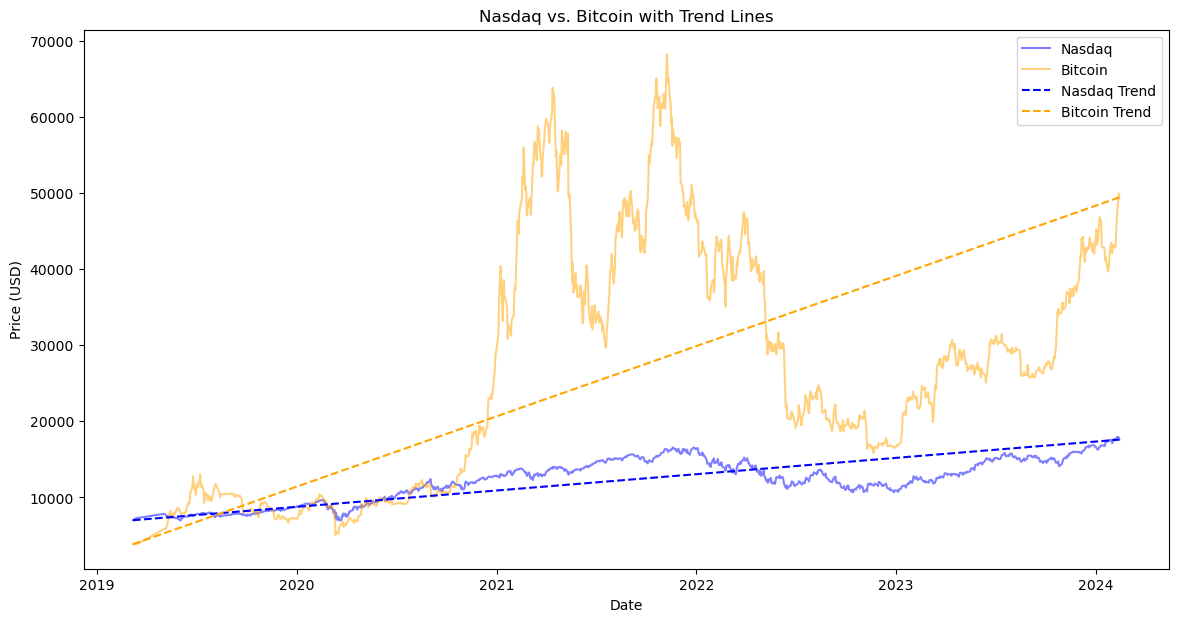

(5.870621186910705, 25.258291735995563)

In [10]:
# Adding lines from the starting point to the endpoint for both Nasdaq and Bitcoin
fig, ax = plt.subplots(figsize=(14, 7))

# Plot Nasdaq and Bitcoin prices
ax.plot(merged_df['Date'], merged_df['Price (USD)_Nasdaq'], label='Nasdaq', color='blue', alpha=0.5)
ax.plot(merged_df['Date'], merged_df['Price (USD)_Bitcoin'], label='Bitcoin', color='orange', alpha=0.5)

# Calculate the starting and ending points for Nasdaq and Bitcoin
start_nasdaq = merged_df['Price (USD)_Nasdaq'].iloc[0]
end_nasdaq = merged_df['Price (USD)_Nasdaq'].iloc[-1]
start_bitcoin = merged_df['Price (USD)_Bitcoin'].iloc[0]
end_bitcoin = merged_df['Price (USD)_Bitcoin'].iloc[-1]

# Draw lines from the starting to the ending points
ax.plot([merged_df['Date'].iloc[0], merged_df['Date'].iloc[-1]], [start_nasdaq, end_nasdaq], label='Nasdaq Trend', color='blue', linestyle='--')
ax.plot([merged_df['Date'].iloc[0], merged_df['Date'].iloc[-1]], [start_bitcoin, end_bitcoin], label='Bitcoin Trend', color='orange', linestyle='--')

# Add legend and labels
ax.legend()
ax.set_title('Nasdaq vs. Bitcoin with Trend Lines')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')

plt.show()

# Calculate the slopes (curves) of the trend lines for Nasdaq and Bitcoin
time_diff_days = (merged_df['Date'].iloc[-1] - merged_df['Date'].iloc[0]).days

slope_nasdaq = (end_nasdaq - start_nasdaq) / time_diff_days
slope_bitcoin = (end_bitcoin - start_bitcoin) / time_diff_days

slope_nasdaq, slope_bitcoin